##Importing libraries and Data analysis

In [132]:
import pandas as pd
data=pd.read_csv("/content/mushrooms.csv")

In [133]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [134]:
data.shape

(8124, 23)

In [135]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


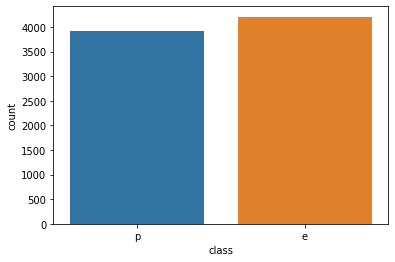

In [136]:
import seaborn as sns
sns.countplot('class',data=data)

In [137]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [138]:
data['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [139]:
for i in data.columns:
  if data[i].nunique()<=2:
    print(data[i].nunique(),i)
  else:
    print(data[i].nunique())

2 class
6
4
10
2 bruises
9
2 gill-attachment
2 gill-spacing
2 gill-size
12
2 stalk-shape
5
4
4
9
9
1 veil-type
4
3
5
9
6
7


Here, I saw that which features have less categories. As here all the features are caegorical, I decided to choose one hot encoding for less categories feature and to do label encoding to comperatively higer categories feature.

As the column 'veil-type' contain one repetative value, so we can consider that it doesn't have any effect on the class classification.

In [140]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [141]:
data=data.drop('veil-type',axis=1)  #Dropping the 'veil-type' column

In [142]:
for i in data.columns:
  if i!='class':
    if data[i].nunique()==2:
     val_dummies = pd.get_dummies(data[i], prefix=i)
     data= pd.concat([data,val_dummies], axis=1)

In [143]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises_f,bruises_t,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,stalk-shape_e,stalk-shape_t
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u,0,1,0,1,1,0,0,1,1,0
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g,0,1,0,1,1,0,1,0,1,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m,0,1,0,1,1,0,1,0,1,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u,0,1,0,1,1,0,0,1,1,0
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,o,o,p,b,c,l,1,0,1,0,1,0,1,0,1,0
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,n,o,p,b,v,l,1,0,1,0,1,0,1,0,1,0
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,o,o,p,b,c,l,1,0,1,0,1,0,1,0,1,0
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,w,o,e,w,v,l,1,0,0,1,1,0,0,1,0,1


In [144]:
data=data.drop(['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape'],axis=1)

Dropped the original columns afer making dummy columns.

In [145]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [146]:
data['class']=lb.fit_transform(data['class'])

In [147]:
for i in data.columns:
  if data[i].nunique()>2:
    data[i]=lb.fit_transform(data[i])

In [148]:
data.head()       # In the dataset informatoion, 1-Poisonous 0-Edible

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises_f,bruises_t,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,stalk-shape_e,stalk-shape_t
0,1,5,2,4,6,4,3,2,2,7,7,2,1,4,2,3,5,0,1,0,1,1,0,0,1,1,0
1,0,5,2,9,0,4,2,2,2,7,7,2,1,4,3,2,1,0,1,0,1,1,0,1,0,1,0
2,0,0,2,8,3,5,2,2,2,7,7,2,1,4,3,2,3,0,1,0,1,1,0,1,0,1,0
3,1,5,3,8,6,5,3,2,2,7,7,2,1,4,2,3,5,0,1,0,1,1,0,0,1,1,0
4,0,5,2,3,5,4,3,2,2,7,7,2,1,0,3,0,1,1,0,0,1,0,1,1,0,0,1


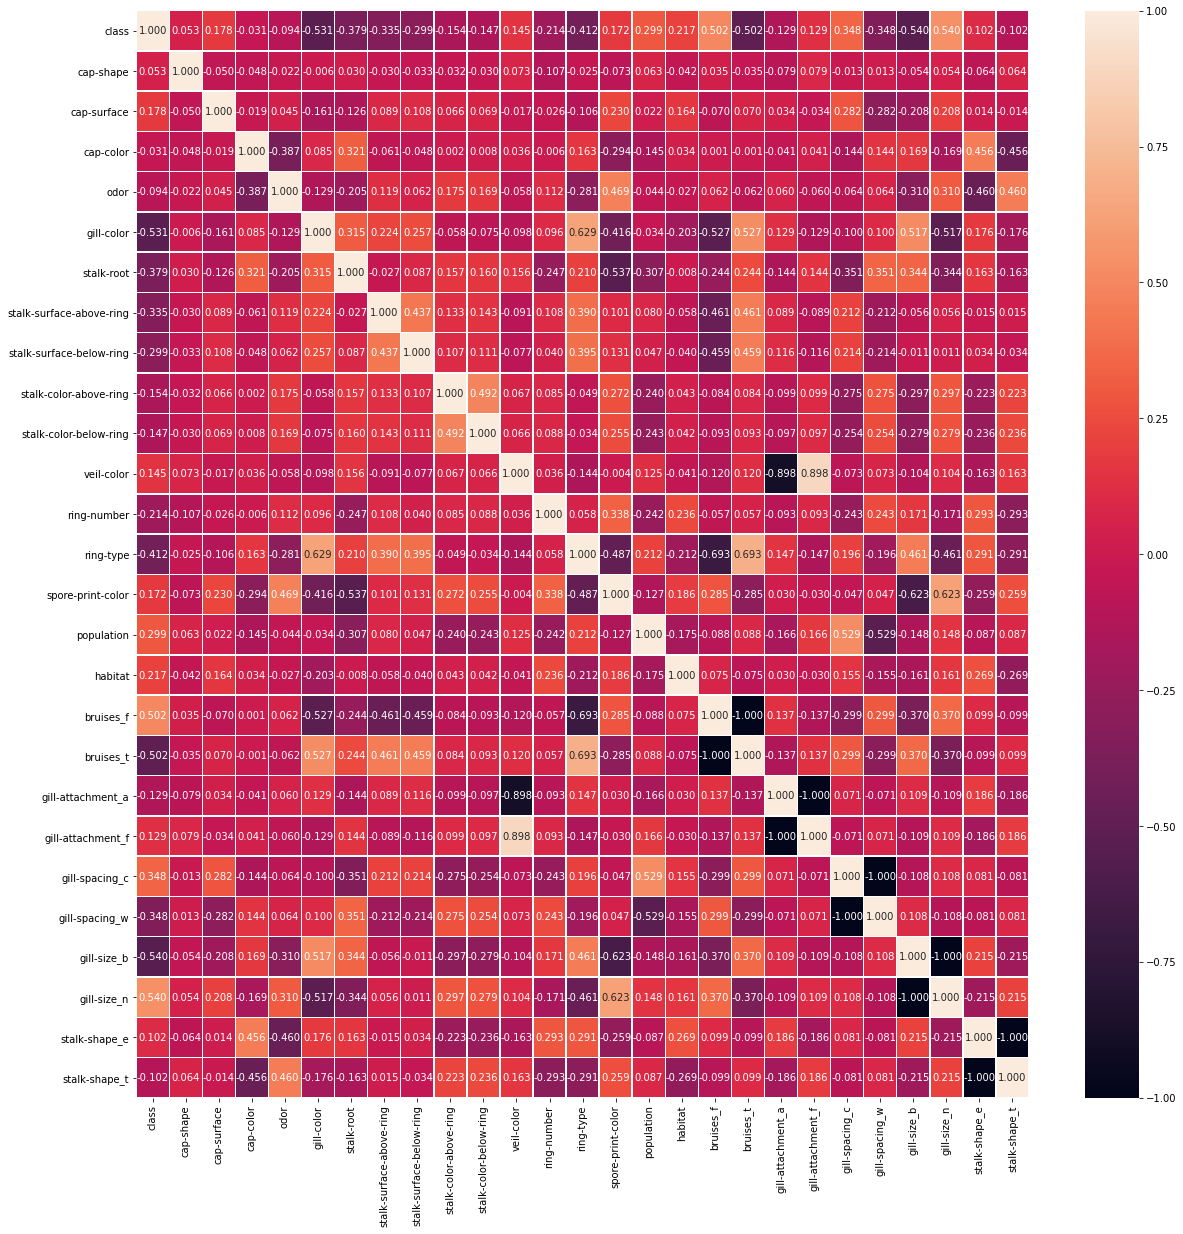

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt= '.3f')

#Building Model

In [150]:
X_train = data.drop("class", axis=1)
y_train = data["class"]

In [151]:
from sklearn.model_selection import train_test_split

# splitting data in training set(80%) and test set(20%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

##Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #create the object of the model
lr = lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

act = accuracy_score(y_train,lr.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,lr.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,lr.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,lr.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  94.96845668564394
Training Precision is:  95.24739583333334
Training Recall is:  94.17444480205987
Training F1 Score is:  94.70788153422885


In [154]:
act = accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,lr.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,lr.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,lr.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  95.38461538461539
Test Precision is:  96.22166246851386
Test Recall is:  94.43757725587145
Test F1 Score is:  95.32127261384903


##Decision Tree Classifier

In [155]:
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTr=clf.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [156]:
act = accuracy_score(y_train,DTr.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,DTr.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,DTr.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,DTr.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  95.6916448684413
Training Precision is:  93.99315281668223
Training Recall is:  97.19987125844867
Training F1 Score is:  95.56962025316454


In [157]:
act = accuracy_score(y_test,DTr.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,DTr.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,DTr.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,DTr.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  95.81538461538462
Test Precision is:  94.37125748502993
Test Recall is:  97.40420271940667
Test F1 Score is:  95.86374695863748


##Random Forest Classifier

In [158]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [159]:
act = accuracy_score(y_train,RF.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,RF.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,RF.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,RF.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  99.12294199107555
Training Precision is:  100.0
Training Recall is:  98.16543289346636
Training F1 Score is:  99.07422445996427


In [160]:
act = accuracy_score(y_test,RF.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,RF.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,RF.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,RF.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  99.07692307692308
Test Precision is:  100.0
Test Recall is:  98.14585908529048
Test F1 Score is:  99.0642545227698


From all the models, Random Forest gives the best accuracy 99%,
and should be chosen as the final model.